# El equipo local ganará?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Leer data

In [2]:
df = pd.read_csv('data/dataset/2020-2024 Matches Liga 1 Teams.csv', parse_dates=['DateTime'])
df.drop(['Unnamed: 0', 'Day'], axis=1, inplace=True)
# Se tomará solo la competición de la Liga 1
df = df.loc[df['Comp'] == 'Liga 1']
df.shape

(2211, 15)

# Explorando Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2211 non-null   object        
 1   Time           2211 non-null   object        
 2   Comp           2211 non-null   object        
 3   Round          2211 non-null   object        
 4   Venue          2211 non-null   object        
 5   Result         2211 non-null   object        
 6   GF             2211 non-null   object        
 7   GA             2211 non-null   object        
 8   Opponent       2211 non-null   object        
 9   Captain        2151 non-null   object        
 10  Formation      2188 non-null   object        
 11  Opp Formation  2188 non-null   object        
 12  Referee        1800 non-null   object        
 13  Team           2211 non-null   object        
 14  DateTime       2211 non-null   datetime64[ns]
dtypes: datetime64[ns](1), obje

In [4]:
df.describe(include='all')

,Date,Time,Comp,Round,Venue,Result,GF,GA,Opponent,Captain,Formation,Opp Formation,Referee,Team,DateTime
count,2211,2211,2211,2211,2211,2211,2211,2211,2211,2151,2188,2188,1800,2211,2211
unique,598,38,1,6,2,3,11,9,26,155,21,20,44,18,NaN
top,2023-10-29,15:30,Liga 1,Torneo Apertura,Away,W,1,1,Sporting Cristal,Bernardo Cuesta,4-2-3-1,4-2-3-1,Joel Alarcón,Sporting Cristal,NaN
freq,10,498,2211,988,1107,902,746,760,124,98,975,1001,164,170,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-17 12:10:37.340569600
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 18:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-09 13:15:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-29 13:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-02 20:30:00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-03 15:00:00


## Eliminamos columnas
Eliminamos las columnas 'Captain' y 'Referee' que por problema de dominmio sabemos que no aportan mucho valor

In [5]:
# Eliminamos las columnas porque no ofrece información valiosa
df.drop(['Captain', 'Referee'], axis=1, inplace=True)

## Analizamos la columna 'Round'
Encontramos que existen Finals y Final, valores que representan a finales.

Por lo tanto, reemplazaremos para que exista solo una etiqueta que haga referencia a las finales.

In [6]:
df['Round'].unique()

array(['Torneo Apertura', 'Group Stage', 'Torneo Clausura', 'Final',
       'Semi-finals', 'Finals'], dtype=object)

In [7]:
df['Round'] = df['Round'].replace({'Finals': 'Final'})
df['Round'].unique()

array(['Torneo Apertura', 'Group Stage', 'Torneo Clausura', 'Final',
       'Semi-finals'], dtype=object)

## Analizamos los nombre de equipos
Encontramos que hay diferentes nombres para los mismos equipos

In [8]:
teams = df['Team'].unique()
teams = set(teams)

In [9]:
opps = df['Opponent'].unique()
opps = set(opps)

In [10]:
# Equipos que no existen en Opps pero sí en Teams
# Son equipos que deberían estar en ambos y si no están, es por una inconsistencia en los nombres
teams - opps

{'Alianza Universidad', 'Universidad Técnica de Cajamarca'}

In [11]:
# Buscamos si estos equipos si se encuentran en Opps pero con diferente nombres
opps - teams

{'Alianza Univ',
 'Cantolao',
 'Carlos Stein',
 'Dep Municipal',
 'Llacuabamba',
 'Mannucci',
 'U César Vallejo',
 'USMP',
 'UTC',
 'Unión Comercio'}

### Reemplazamos nombres
Verificamos que los equipos sí están en ambas columnas, sin embargo con diferentes nombres.

Por lo tanto, reemplazaremos los valores para que corregir la inconsistencia.

In [12]:
replace = {'Alianza Univ': 'Alianza Universidad', 'Universidad Técnica de Cajamarca': 'UTC'}
df['Team'] = df['Team'].replace(replace)
df['Opponent'] = df['Opponent'].replace(replace)

In [13]:
teams = df['Team'].unique()
teams = set(teams)
opps = df['Opponent'].unique()
opps = set(opps)

In [14]:
teams - opps

set()

## Analizamos las columnas 'GF' y 'GA'
Estas columnas deberían ser numéricas, sin embargo, en el dataset están el tipo de dato 'object'.

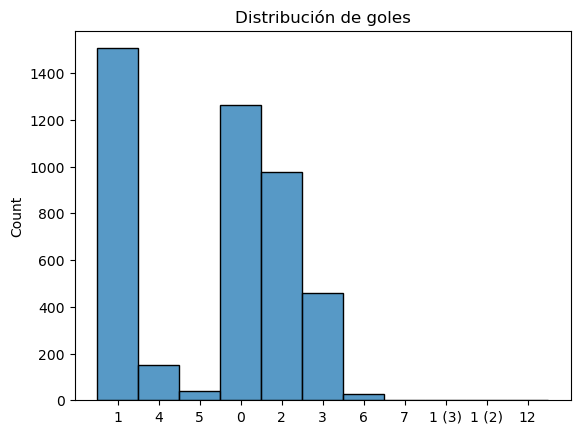

In [15]:
df_gf_ga = pd.concat([df['GF'], df['GA']])
plt.title('Distribución de goles')
sns.histplot(df_gf_ga);

Como podemos visualizar, exsiten 2 valores con ().
Haciendo el análisis correspondiente, estos valores son de un partido eliminatorio, que al quedar en empate, fue resulto mediante penales.
Ahora mismo, los penales no son datos que queremos tener, por lo tanto nos quedaremos con los goles del partido realizados en juego.

In [16]:
# Se tratará como empate y se ignorará los goles de penales
def get_goals(row):
    row['GF'] = row['GF'].split('(')[0].strip()
    row['GA'] = row['GA'].split('(')[0].strip()
    return row
df = df.apply(get_goals, axis=1)
df['GF'] = df['GF'].astype('int64')
df['GA'] = df['GA'].astype('int64')

In [17]:
#plt.figure(figsize=(12, 6))
df.describe()

,GF,GA,DateTime
count,2211.000000,2211.000000,2211
mean,1.397105,1.226142,2022-09-17 12:10:37.340569600
min,0.000000,0.000000,2020-01-31 18:00:00
25%,0.000000,0.000000,2021-08-09 13:15:00
50%,1.000000,1.000000,2022-09-29 13:00:00
75%,2.000000,2.000000,2023-10-02 20:30:00
max,12.000000,6.000000,2024-11-03 15:00:00
std,1.254015,1.142936,NaN


## Analizamos partidos duplicados
Debido a la naturaleza del dataset, el cual contiene todos los partidos por equipo, se tienen partidos duplicados.
Ejemplo:

- Universitario vs Alianza Lima: De este partido se tiene el registro de Univeristario en una fila y el de Alianza en otra.

Por lo tanto, debemos reducir el dataset para que exista un registro por partido con el equipo local y equipo visitante.

In [18]:
def get_result_by_ht(row):
    """Función que modificará el valor de 'Result' cuando Venue es visitante, 
    para que tenga el valor desde el punto de vista del equipo local

    Parámetro
    ---------
    row: Fila en cuestión.

    Retorna:
    result: Resultado desde el punto de vista del equipo local.
    """
    
    result = row['Result']
    
    if result == 'W':   # Equipo visitante ganó
        result = 'L'    # Equipo local perdió
    elif result == 'L': # Equipo visitante perdió
        result = 'W'    # Equipo local ganó
    return result

In [19]:
def parse_local_match(row):
    """
    Función que se encarga de representar los registros en función del equipo
    local. Es decir, columnas como GF (Goles a Favor) y GA (Goles en contra) serán 
    solo del equipo local.
    """
    if row['Venue'] == 'Home':
        row['Home Team'] = row['Team']
        row['Away Team'] = row['Opponent']
        row['Home Formation'], row['Away Formation'] = row['Formation'], row['Opp Formation']
    else:
        row['Home Team'] = row['Opponent']
        row['Away Team'] = row['Team']
        row['GF'], row['GA'] = row['GA'], row['GF']
        row['Home Formation'], row['Away Formation'] = row['Opp Formation'], row['Formation']
        row['Result'] = get_result_by_ht(row)

    return row

In [20]:
df = (df.apply(parse_local_match, axis=1)
      # Borramos los registros duplicados en las columnas de la hora, equipo local, y equipo visitante
      .drop_duplicates(subset=['DateTime', 'Home Team', 'Away Team'], ignore_index=True)
      # Borramos columnas que ya no aportan valor
      .drop(['Comp', 'Date', 'Time', 'Venue', 'Opponent', 'Team', 'Formation', 'Opp Formation'], axis=1)
      # Ordenar las filas por fecha
      .sort_values(['DateTime'], axis=0, ignore_index=True)
     )
df.head()

,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation
0,Torneo Apertura,L,1,2,2020-01-31 18:00:00,Melgar,Universitario,4-3-3,4-2-3-1
1,Torneo Apertura,L,2,3,2020-01-31 20:30:00,Alianza Lima,Alianza Universidad,3-4-3,4-4-2
2,Torneo Apertura,W,2,1,2020-02-01 15:00:00,UTC,Sporting Cristal,4-2-3-1,4-3-3
3,Torneo Apertura,W,1,0,2020-02-01 17:30:00,Sport Huancayo,Atlético Grau,4-2-3-1,4-2-3-1
4,Torneo Apertura,W,3,1,2020-02-02 11:00:00,USMP,Ayacucho,4-3-3,4-4-2


In [21]:
df.shape

(1416, 9)

## Analizamos las columnas 'Formation' y 'Opp Formation'
Por qué las columnas 'Formation' y 'Opp Formation' tienen inconsistencias en sus valores y nulos.

### Resolviendo data inconsistente

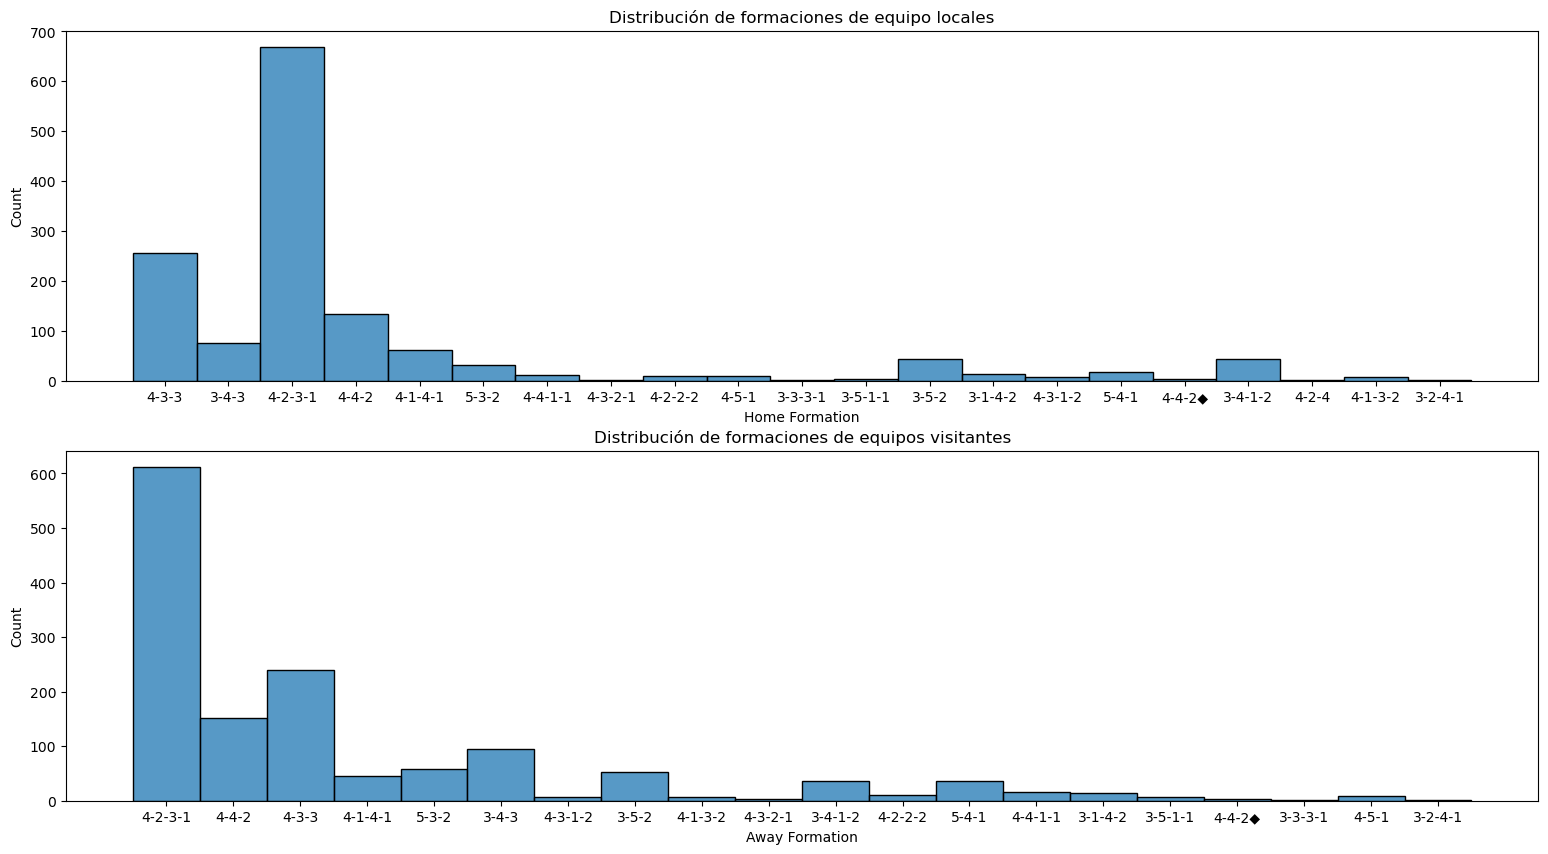

In [22]:
fig, axs = plt.subplots(2, figsize=(19, 10))

axs.flat[0].set_title('Distribución de formaciones de equipo locales')
sns.histplot(ax = axs.flat[0], x=df['Home Formation'], bins='auto');

axs.flat[1].set_title('Distribución de formaciones de equipos visitantes')
sns.histplot(ax = axs.flat[1], x=df['Away Formation'], bins='auto');

Identificamos que existe el valor '4-4-2◆' que debemos reemplazar con el '4-4-2'

In [23]:
df['Home Formation'] = df['Home Formation'].replace('4-4-2◆', value='4-4-2')
df['Away Formation'] = df['Away Formation'].replace('4-4-2◆', value='4-4-2')

### Resolviendo valores nulos

In [24]:
formation_nan = df.loc[(df['Home Formation'].isnull()) | (df['Away Formation'].isnull())]
print(formation_nan.shape)
formation_nan.head()

(14, 9)


,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation
9,Torneo Apertura,D,1,1,2020-02-08 13:15:00,Atlético Grau,U César Vallejo,NaN,NaN
29,Torneo Apertura,L,2,3,2020-02-22 13:15:00,Atlético Grau,Sport Boys,NaN,NaN
38,Torneo Apertura,W,3,0,2020-02-29 20:00:00,Alianza Universidad,Llacuabamba,NaN,NaN
40,Torneo Apertura,D,1,1,2020-03-01 15:00:00,Carlos Stein,Binacional,NaN,NaN
53,Torneo Apertura,W,3,0,2020-08-10 13:15:00,Alianza Lima,Binacional,NaN,NaN


Al revisar los valores pérdidos se puede entender que no se registraron, por lo tanto sería conveniente imputar dichos valores.

Para ello, la imputación se realizará mediante la moda de cada equipo mediante su condición del local y visitante en cada temporada

In [25]:
def imputation_formation(row, df):
    year, team, opp_team = row['DateTime'].year, row['Home Team'], row['Away Team']
    
    formation_mode = df[(df['DateTime'].dt.year == year) & (df['Home Team']== team)]['Home Formation'].mode()
    opp_formation_mode = df[(df['DateTime'].dt.year == year) & (df['Away Team']== opp_team)]['Away Formation'].mode()

    row['Home Formation'] = formation_mode.iloc[0]
    row['Away Formation'] = opp_formation_mode.iloc[0]

    return row

In [26]:
formation_nan = formation_nan.apply(imputation_formation, axis=1, df=df)
df.loc[formation_nan.index] = formation_nan
df.loc[formation_nan.index].head()

,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation
9,Torneo Apertura,D,1,1,2020-02-08 13:15:00,Atlético Grau,U César Vallejo,4-2-3-1,4-2-3-1
29,Torneo Apertura,L,2,3,2020-02-22 13:15:00,Atlético Grau,Sport Boys,4-2-3-1,4-2-3-1
38,Torneo Apertura,W,3,0,2020-02-29 20:00:00,Alianza Universidad,Llacuabamba,4-4-2,4-2-3-1
40,Torneo Apertura,D,1,1,2020-03-01 15:00:00,Carlos Stein,Binacional,4-2-3-1,4-2-3-1
53,Torneo Apertura,W,3,0,2020-08-10 13:15:00,Alianza Lima,Binacional,4-3-3,4-2-3-1


In [27]:
print(f'Formation tiene NaN = {df['Home Formation'].isnull().any()}\nOpp Formation tiene NaN = {df['Away Formation'].isnull().any()}')

Formation tiene NaN = False
Opp Formation tiene NaN = False


## Preguntas exploratorias

### Cuántos goles marcados tiene el equipo local y visitante antes de cada partido?

In [28]:
def get_goals_scored_conceded(df: pd.DataFrame) -> pd.DataFrame:
    """Permite calcular los goles que cada equipo marcó y recibió antes de cada partido de temporada.

    Parámetros
    ----------
    df: DataFrame
        Dataframe del que se obtiene los datos
        
    Retorna
    -------
    DataFrame:
        DataFrame con nuevas columnas añadidas:
        'HTGS' (Home Team Goals Scored),
        'ATGS' (Away Teams Goals Scored), 
        'HTGC' (Home Team Goals Conceded) y 
        'ATGC' (Away Teams Goals Conceded).
    """
    # Columna útil para la agrupación por temporadas
    df['year'] = df['DateTime'].dt.year
    # DataFrame con los goles de los equipos locales en sus respectivos años
    df_home = df[['year', 'Home Team', 'GF', 'GA']].rename(columns={'year':'year','Home Team': 'Team', 'GF': 'Goals_scored', 'GA': 'Goals_Conceded'})
    df_home['Venue'] = 'Home'
    
    # DataFrame con los goles de los equipo visitantes en sus respectivos años
    df_away = df[['year', 'Away Team', 'GA', 'GF']].rename(columns={'year':'year','Away Team': 'Team', 'GA': 'Goals_scored', 'GF': 'Goals_Conceded'})
    df_away['Venue'] = 'Away'
    
    # Concatenamos para tenerlos todos en un solo DataFrame largo
    df_largo = pd.concat([df_home, df_away])
    # Ordenamos por índice para que los partidos estén ordenados
    df_largo = df_largo.sort_index()

    # Creamos el dataframe de goles acumulados
    df_largo['GS'] = (df_largo
                      # Agrupamos mediante el año y el equipo y obtenemos la columna 'Goals Scored'
                      .groupby(['year', 'Team'])['Goals_scored']
                      # Shifteamos en 1 periodo para que la suma acumulativa comience en 0
                     .shift(fill_value=0)
                      # Volvemos a agrupar debido a que pandas olvida que había agrupado despues de shiftear
                     .groupby([df_largo['year'], df_largo['Team']])
                      # Realizamos la suma acumulativa por grupo (año y equipo)
                     .cumsum());

    df_largo['GC'] = (df_largo
                      .groupby(['year', 'Team'])['Goals_Conceded']
                      .shift(fill_value=0)
                      .groupby([df_largo['year'], df_largo['Team']])
                      .cumsum());

    # Pivoteamos para que los valores de la columna Venue (Away y Home), sean las columnas
    # y que la data de cada fila sean los goles acumulados (GS)
    # El orden será en base al índice (partido)
    df_pivot_gs = df_largo.pivot(columns='Venue', values='GS')
    df_pivot_gc = df_largo.pivot(columns='Venue', values='GC')
    
    df_pivot_gs.columns = ['ATGS', 'HTGS']
    df_pivot_gc.columns = ['ATGC', 'HTGC']

    # Concatemamos (ordenando las columnas) y retornamos el nuevo DataFrame
    return (pd.concat([df, df_pivot_gs[['HTGS', 'ATGS']], df_pivot_gc[['HTGC', 'ATGC']]], axis=1)
           .drop('year', axis=1))

In [29]:
df = get_goals_scored_conceded(df)

Revisamos si la acumulación de goles está correcto verificando a solo un equipo.

In [30]:
team = 'Melgar'
df[(df['Home Team'] == team) | (df['Away Team'] == team)].head(10)

,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation,HTGS,ATGS,HTGC,ATGC
0,Torneo Apertura,L,1,2,2020-01-31 18:00:00,Melgar,Universitario,4-3-3,4-2-3-1,0,0,0,0
10,Torneo Apertura,L,2,4,2020-02-08 15:00:00,Binacional,Melgar,4-2-3-1,4-1-4-1,2,1,0,2
24,Torneo Apertura,W,1,0,2020-02-16 15:30:00,Melgar,Sporting Cristal,4-1-4-1,4-1-4-1,5,4,4,4
30,Torneo Apertura,W,3,1,2020-02-22 15:30:00,Cusco,Melgar,4-2-3-1,4-1-4-1,3,6,7,4
34,Torneo Apertura,D,1,1,2020-02-28 15:00:00,UTC,Melgar,4-2-3-1,4-4-2,4,7,3,7
47,Torneo Apertura,W,1,0,2020-03-07 20:00:00,Melgar,Sport Huancayo,4-3-3,4-2-3-1,8,6,8,5
60,Torneo Apertura,D,0,0,2020-08-19 18:00:00,U César Vallejo,Melgar,4-2-3-1,4-2-3-1,5,9,6,8
69,Torneo Apertura,L,0,2,2020-08-27 15:30:00,Melgar,Carlos Stein,4-2-3-1,4-1-4-1,9,4,8,7
75,Torneo Apertura,W,1,0,2020-08-31 18:00:00,Sport Boys,Melgar,4-2-3-1,4-2-3-1,15,9,21,10
80,Torneo Apertura,D,2,2,2020-09-07 11:00:00,Melgar,Alianza Lima,4-2-3-1,4-2-3-1,9,9,11,9


### Cuál es la diferencia de goles que tiene el equipo local y visitante antes de cada partido?

In [31]:
# Home Team Goals Difference
df['HTGD'] = df['HTGS'] - df['HTGC']

# Away Team Goals Difference
df['ATGD'] = df['ATGS'] - df['ATGC']

In [32]:
team = 'Melgar'
df[(df['Home Team'] == team) | (df['Away Team'] == team)].head(10)

,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation,HTGS,ATGS,HTGC,ATGC,HTGD,ATGD
0,Torneo Apertura,L,1,2,2020-01-31 18:00:00,Melgar,Universitario,4-3-3,4-2-3-1,0,0,0,0,0,0
10,Torneo Apertura,L,2,4,2020-02-08 15:00:00,Binacional,Melgar,4-2-3-1,4-1-4-1,2,1,0,2,2,-1
24,Torneo Apertura,W,1,0,2020-02-16 15:30:00,Melgar,Sporting Cristal,4-1-4-1,4-1-4-1,5,4,4,4,1,0
30,Torneo Apertura,W,3,1,2020-02-22 15:30:00,Cusco,Melgar,4-2-3-1,4-1-4-1,3,6,7,4,-4,2
34,Torneo Apertura,D,1,1,2020-02-28 15:00:00,UTC,Melgar,4-2-3-1,4-4-2,4,7,3,7,1,0
47,Torneo Apertura,W,1,0,2020-03-07 20:00:00,Melgar,Sport Huancayo,4-3-3,4-2-3-1,8,6,8,5,0,1
60,Torneo Apertura,D,0,0,2020-08-19 18:00:00,U César Vallejo,Melgar,4-2-3-1,4-2-3-1,5,9,6,8,-1,1
69,Torneo Apertura,L,0,2,2020-08-27 15:30:00,Melgar,Carlos Stein,4-2-3-1,4-1-4-1,9,4,8,7,1,-3
75,Torneo Apertura,W,1,0,2020-08-31 18:00:00,Sport Boys,Melgar,4-2-3-1,4-2-3-1,15,9,21,10,-6,-1
80,Torneo Apertura,D,2,2,2020-09-07 11:00:00,Melgar,Alianza Lima,4-2-3-1,4-2-3-1,9,9,11,9,-2,0


### Cuál es el ratio de gol por partido que tiene el equipo local y visitante antes de cada partido?

In [33]:
def get_match_week(df: pd.DataFrame) -> pd.DataFrame:
    """Función que calcula la semana de partido de cada partido

    Parámetro
    ---------
    df: DataFrame con los datos a calcular

    Retorna
    -------
    DataFrame: Mismo DataFrame con la columna 'MW' (Match Week) añadida
    """
    df['year'] = df['DateTime'].dt.year
    df_home = df[['year', 'Home Team']].rename(columns={'year': 'year', 'Home Team': 'Team'})
    df_home['venue'] = 'Home'

    df_away = df[['year', 'Away Team']].rename(columns={'year': 'year', 'Away Team': 'Team'})
    df_away['venue'] = 'Away'

    df_largo = pd.concat([df_home, df_away])
    df_largo = df_largo.sort_index()
    
    # Numeramos cada aparición de cada grupo desde 1
    df_largo['MW'] = (df_largo.groupby(['year', 'Team'])
                      .cumcount() + 1
                     )
    # Obtenemos el match week del equipo local y visitante
    df_pivot = df_largo.pivot(columns='venue', values='MW')
    # Creamos la columna 'MW' con el valor más alto de cada fila
    # Porque la diferencia puede deberse al descanso de un equipo en una fecha
    # Pero la semana se jugó por lo que el retraso de partidos jugados no se debe contar
    df_pivot['MW'] = df_pivot[['Away', 'Home']].max(axis=1)

    return (pd.concat([df, df_pivot['MW']], axis=1)
            .drop('year', axis=1))

In [34]:
df = get_match_week(df)

In [35]:
# Rendimiento del equipo local y visitante con respectos a los goles marcados
df['HTGSForm'] = df['HTGS'] / (df['MW'] - 1)
df['ATGSForm'] = df['ATGS'] / (df['MW'] - 1)

df['HTGSForm'] = df['HTGSForm'].fillna(0)
df['ATGSForm'] = df['ATGSForm'].fillna(0)

# Rendimiento del equipo local y visitante con respecto a los goles recibidos
df['HTGCForm'] = df['HTGC'] / (df['MW'] - 1)
df['ATGCForm'] = df['ATGC'] / (df['MW'] - 1)

df['HTGCForm'] = df['HTGCForm'].fillna(0)
df['ATGCForm'] = df['ATGCForm'].fillna(0)

In [36]:
team = 'Universitario'
df[(df['DateTime'].dt.year == 2023) & ((df['Home Team'] == team) | (df['Away Team'] == team))].head()

,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation,HTGS,ATGS,HTGC,ATGC,HTGD,ATGD,MW,HTGSForm,ATGSForm,HTGCForm,ATGCForm
794,Torneo Apertura,W,4,0,2023-02-04 15:30:00,Universitario,Cantolao,4-4-2,4-4-2,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.0
804,Torneo Apertura,W,1,0,2023-02-12 13:30:00,Unión Comercio,Universitario,4-2-3-1,4-2-3-1,1,4,2,0,-1,4,2,1.000000,4.000000,2.000000,0.0
812,Torneo Apertura,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,3-5-2,4-2-3-1,4,2,1,3,3,-1,3,2.000000,1.000000,0.500000,1.5
820,Torneo Apertura,W,2,0,2023-02-26 19:00:00,Mannucci,Universitario,4-4-2,4-3-3,2,5,1,3,1,2,4,0.666667,1.666667,0.333333,1.0
826,Torneo Apertura,W,1,0,2023-03-05 15:30:00,Universitario,Melgar,4-2-3-1,4-3-3,5,0,5,6,0,-6,5,1.250000,0.000000,1.250000,1.5


# Modelando - Baseline

## Preprocesamiento

### Función de preprocesamiento

In [37]:
def get_preprocessing(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame):
    """Función que realiza el preprocesamiento necesario a la data para entrenar
    
    Parámetro
    =========
    df: DataFrame con la data para preprocesar

    Retorna
    =======
    X_train: DataFrame con el 80% de la data para realizar el entrenamiento
    X_valid: DataFrame con el 20% de la data para realizar la validación
    y_train: DataFrame con el 80% del target (Result)
    y_valid: DataFrame con el 20% del target (Result)
    """
    X = df.copy()
    y = X.pop('Result')
    
    def home_team_win(result):
        """Función que transforma el valor de 'Result' a binario.

        Retorna
        =======
        0: Si el equipo local no ganó
        1: Si el equipo local ganó
        """
        if result == 'W':
            result = 1
        else:
            result = 0
        return result

    y = y.apply(home_team_win)

    # Obtenemos las columnas numéricas y las object
    object_columns = [cols for cols in X.columns if X[cols].dtype == 'object']
    numeric_columns = [cols for cols in X.columns if X[cols].dtype != 'object']

    # Eliminamos las columnas categóricas que tengan más de 10 valores únicos
    drop_columns = [cols for cols in object_columns if X[cols].nunique() > 10]
    
    # Dropeamos columnas de ayuda y columnas categorícas con valore únicos altos (por ahora)
    X.drop(['DateTime',  'GF', 'GA'] + drop_columns, axis=1, inplace=True)

    # Dividimos el dataset en un set de entrenamiento y validación
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                            random_state=69)

    # Obtenemos nuevamente las columnas numéricas y categóricas después del dropeo
    object_columns = [cols for cols in X.columns if X[cols].dtype == 'object']
    numeric_columns = [cols for cols in X.columns if X[cols].dtype != 'object']

    # Escalamos las columnas numéricas
    scaler = StandardScaler().fit(X_train[numeric_columns])
    X_train_scaled = scaler.transform(X_train[numeric_columns])
    X_valid_scaled = scaler.transform(X_valid[numeric_columns])

    # Realizamos One Hot Encoding a las columnas categóricas
    dummies_train = pd.get_dummies(X_train[object_columns], dtype=float).reset_index(drop=True)
    dummies_valid = pd.get_dummies(X_valid[object_columns], dtype=float).reset_index(drop=True)

    # Concatenamos ambos DataFrames
    X_train_full = pd.concat([pd.DataFrame(X_train_scaled), dummies_train],
                             axis=1, ignore_index=True)
    X_valid_full = pd.concat([pd.DataFrame(X_valid_scaled), dummies_valid],
                             axis=1, ignore_index=True)

    # Volvemos a asignar los nombres de las columnas
    columns = numeric_columns + list(dummies_train.columns)
    
    X_train_full.columns = columns
    X_valid_full.columns = columns
    return X_train_full, X_valid_full, y_train, y_valid

## Entrenando

In [38]:
X_train, X_valid, y_train, y_valid = get_preprocessing(df)

In [39]:
X_train.head()

,HTGS,ATGS,HTGC,ATGC,HTGD,ATGD,MW,HTGSForm,ATGSForm,HTGCForm,ATGCForm,Round_Final,Round_Group Stage,Round_Semi-finals,Round_Torneo Apertura,Round_Torneo Clausura
0,-0.097712,0.145629,-0.223875,0.595924,0.135573,-0.525918,0.699735,-0.724554,-0.453830,-0.910151,0.039597,0.0,0.0,0.0,0.0,1.0
1,-0.770934,-0.522872,-0.966626,-0.502631,0.135573,-0.084599,-0.632386,-0.592392,0.073365,-0.983609,0.203316,0.0,0.0,0.0,1.0,0.0
2,1.114087,1.348932,0.370326,-0.282920,1.003120,2.121997,0.802205,0.554952,0.790936,-0.342210,-1.051864,0.0,0.0,0.0,0.0,1.0
3,-0.434323,0.279330,0.593151,0.522687,-1.252501,-0.261127,0.494793,-1.009609,-0.119103,0.205327,0.175004,0.0,0.0,0.0,0.0,1.0
4,0.171576,-0.121771,-0.818076,-0.356157,1.176629,0.268456,-0.632386,1.910905,1.127755,-0.608156,0.599689,0.0,0.0,0.0,1.0,0.0


### Función para obtener el Accuracy del modelo

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

def get_scores(X_train, X_valid, y_train, y_valid, random_state=69) -> dict():
    """Función que obtiene el Accuracy para los modelos Logistic Regression,
    SVC, Decision Tree, RandomForest y XGBoost

    Parámetros
    ==========
    X_train: Set de datos para entrenar los modelos
    X_valid: Set de datos para validar los modelos
    y_train: Set de valores del target para entrenar
    y_valid: Set de valores del target para validar

    Retorna
    =======
    score: Diccionario con el Accuracy de cada modelo
    """
    classifiers = []

    classifiers.append(LogisticRegression(random_state=random_state,
                            solver='liblinear',
                            penalty='l2'))

    classifiers.append(SVC(kernel='linear',
                 random_state=random_state))

    classifiers.append(DecisionTreeClassifier(random_state=random_state,
                                             criterion='gini'))

    classifiers.append(RandomForestClassifier(n_estimators=50,
                                             random_state=random_state))

    classifiers.append(xgb.XGBClassifier(learning_rate=0.01,
                                         objective='binary:logistic',
                                         random_state=random_state))

    # Diccionario que tendrá {"Nombre del modelo": valor del Accuracy del modelo con el set de validación}
    scores = {clf.__class__.__name__: clf.fit(X_train, y_train).score(X_valid, y_valid) for clf in classifiers}

    return scores

In [41]:
scores_1 = get_scores(X_train, X_valid, y_train, y_valid)
scores_1

{'LogisticRegression': 0.6443661971830986,
 'SVC': 0.6408450704225352,
 'DecisionTreeClassifier': 0.5633802816901409,
 'RandomForestClassifier': 0.5915492957746479,
 'XGBClassifier': 0.5915492957746479}

# Feature Engineering

## Añadiendo más features

### Con cuántos puntos llegan los equipos locales y visitante a cada partido?

In [42]:
df_2 = df.copy()

In [43]:
def which_points(row):
    """Función que permite calcular los puntos dependiendo de la localidad del equipo y el resultado del partido
    
       Parámetro 
       --------
       row: Fila con los datos para realizar el cálculo

       Retorna
       -------
       punto: 3 - Equipo gana, 1 - Equipo empata, 0 - Equipo pierde
    """
    result = row['Result']
    venue = row['venue']

    if result == 'D':
        return 1
    if venue == 'Home':
        if result == 'W':
            return 3
    else:
        if result == 'L':
            return 3
    
    return 0

In [44]:
def get_points(df: pd.DataFrame) -> pd.DataFrame:
    """Función que calcula los puntos con los que el equipo local y visitante
    llegan a cada partido.

    Parámetro
    ---------
    df: DataFrame con los datos para calcular los puntos

    Retorna
    -------
    df: DataFrame con las columnas HTP (Home Team Points) y ATP (Away Team Points)
    """
    df['year'] = df['DateTime'].dt.year

    df_home = df[['year', 'Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['venue'] = 'Home'

    df_away = df[['year', 'Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['venue'] = 'Away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    # Calculamos el punto de cada equipo que obtiene del partido
    df_large['Points'] = df_large.apply(which_points, axis=1)

    # Calculamos el acumulado con un periodo de retraso para que comiencen
    # todas las temporadas con 0
    df_large['AccPoints'] = (df_large
                             .groupby(['year', 'Team'])['Points']
                             .shift(fill_value=0)
                             .groupby([df_large['year'], df_large['Team']])
                             .cumsum()
                            )
    df_pivot = df_large.pivot(columns='venue', values='AccPoints')
    df_pivot.columns = ['ATP', 'HTP']
    return (pd.concat([df, df_pivot[['HTP', 'ATP']]], axis=1)
           .drop('year', axis=1))

In [45]:
df_2 = get_points(df_2)

### Cuál es la diferencia de puntos entre ambos equipos antes del partido

In [46]:
df_2['PD'] = df_2['HTP'] - df_2['ATP']

In [47]:
team = 'Alianza Lima'
df_2[(df_2['DateTime'].dt.year == 2023) & ((df_2['Home Team'] == team) | (df_2['Away Team'] == team))].head()

,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation,HTGS,...,HTGD,ATGD,MW,HTGSForm,ATGSForm,HTGCForm,ATGCForm,HTP,ATP,PD
797,Torneo Apertura,W,3,0,2023-02-05 10:00:00,Sporting Cristal,Alianza Lima,4-3-3,4-2-3-1,0,...,0,0,1,0.0,0.0,0.00,0.0,0,0,0
806,Torneo Apertura,W,2,0,2023-02-12 16:00:00,Alianza Lima,Sport Boys,4-4-2,4-3-3,0,...,-3,1,2,0.0,2.0,3.00,1.0,0,3,-3
812,Torneo Apertura,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,3-5-2,4-2-3-1,4,...,3,-1,3,2.0,1.0,0.50,1.5,3,3,0
825,Torneo Apertura,L,0,1,2023-03-05 15:30:00,UTC,Alianza Lima,4-2-3-1,4-1-4-1,4,...,1,0,5,1.0,1.0,0.75,1.0,6,6,0
830,Torneo Apertura,W,2,0,2023-03-11 20:00:00,Alianza Lima,Cusco,4-3-3,4-1-3-2,5,...,1,-2,6,1.0,1.4,0.80,1.8,9,9,0


### Cuál es la forma del equipo mediante el promedio de puntos obtenidos por partido

In [48]:
df_2['HTPForm'] = df_2['HTP'] / df_2['MW']
df_2['ATPForm'] = df_2['ATP'] / df_2['MW']
df_2['PDForm'] = df_2['HTPForm'] - df_2['ATPForm']

### Con cuántos partidos sin perder llegan los equipos locales y visitantes a cada partido?

In [49]:
def calculate_unbeaten_streaks(results):
    u_streak = 0
    unbeaten_list = []
    
    for res in results:
        unbeaten_list.append(u_streak)
        
        if res != 'L':
            u_streak += 1
        else:
            u_streak = 0
        
    return unbeaten_list

In [50]:
def calculate_losing_streaks(results):
    l_streak = 0
    losing_list = []
    
    for res in results:
        losing_list.append(l_streak)
        
        if res != 'L':
            l_streak = 0
        else:
            l_streak += 1
        
    return losing_list

In [51]:
def get_streaks(df: pd.DataFrame) -> pd.DataFrame:
    df_home = df[['Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['venue'] = 'home'

    df_away = df[['Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['venue'] = 'away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    inv = {'W': 'L', 'D': 'D', 'L': 'W'}

    df_large['Result Team'] = df_large.apply(lambda r: r['Result'] if r['venue'] == 'home' else inv[r['Result']], axis=1)
    
    df_large['US'] = (df_large
                           .groupby('Team')['Result Team']
                           .transform(lambda serie: calculate_unbeaten_streaks(serie))
                          )
    df_large['LS'] = (df_large
                           .groupby('Team')['Result Team']
                           .transform(lambda serie: calculate_losing_streaks(serie))
                          )

    df_pivot_us = df_large.pivot(columns='venue', values='US')
    df_pivot_us.columns = ['ATUS', 'HTUS']
    
    df_pivot_ls = df_large.pivot(columns='venue', values='LS')
    df_pivot_ls.columns = ['ATLS', 'HTLS']

    return (pd.concat([df, df_pivot_us[['HTUS', 'ATUS']], df_pivot_ls[['HTLS', 'ATLS']]], axis=1))

In [52]:
df_2 = get_streaks(df_2)

In [53]:
team = 'Universitario'
df_2[(df_2['DateTime'].dt.year == 2023) & ((df_2['Home Team'] == team) | (df_2['Away Team'] == team))].head()

,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation,HTGS,...,HTP,ATP,PD,HTPForm,ATPForm,PDForm,HTUS,ATUS,HTLS,ATLS
794,Torneo Apertura,W,4,0,2023-02-04 15:30:00,Universitario,Cantolao,4-4-2,4-4-2,0,...,0,0,0,0.0,0.00,0.00,12,1,0,0
804,Torneo Apertura,W,1,0,2023-02-12 13:30:00,Unión Comercio,Universitario,4-2-3-1,4-2-3-1,1,...,0,3,-3,0.0,1.50,-1.50,0,13,1,0
812,Torneo Apertura,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,3-5-2,4-2-3-1,4,...,3,3,0,1.0,1.00,0.00,0,1,1,0
820,Torneo Apertura,W,2,0,2023-02-26 19:00:00,Mannucci,Universitario,4-4-2,4-3-3,2,...,4,3,1,1.0,0.75,0.25,2,0,0,2
826,Torneo Apertura,W,1,0,2023-03-05 15:30:00,Universitario,Melgar,4-2-3-1,4-3-3,5,...,3,0,3,0.6,0.00,0.60,0,0,3,4


### Cuáles son los resultados de los últimos 5 partidos de los equipos locales y visitantes antes de cada partido?

In [54]:
def get_5_last_games(df: pd.DataFrame):
    """Función que obtiene el resultado de los últimos 5 partidos de los equipos antes de cada partido

    Parámetro
    =========
    df: DataFrame con la data para el análisis

    Retorna
    =======
    df: DataFrame con las columnas LM_1, LM_2, ..., LM_5 que representan
        a los resultados de los últimos 5 partidos jugados.
    """
    df['year'] = df['DateTime'].dt.year

    df_home = df[['year', 'Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['Venue'] = 'home'

    df_away = df[['year', 'Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['Venue'] = 'away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    # Resultado invertido para el equipo visitante
    inv = {'W': 'L', 'D': 'D', 'L': 'W', 'M': 'M'}

    for i in range(1, 6):
        colname = 'LM_' + str(i)
        df_large[colname] = (df_large.groupby(['year', 'Team'])
                             # Corremos la data i periodos para tener los resultados de los i últimos partidos antes de cada partido
                            .shift(i, fill_value='M')
                             # En caso el equipo en cuestión sea visitante, se invierte el resultado
                            .apply(lambda row: row['Result'] if row['Venue'] == 'home' else inv[row['Result']], axis=1))

        df_pivot = df_large.pivot(columns='Venue', values=colname)
        df_pivot.columns = ['A' + colname, 'H' + colname]

        df = pd.concat([df, df_pivot[['H' + colname, 'A' + colname]]], axis=1)
    
    return df.drop('year', axis=1)

In [55]:
df_2 = get_5_last_games(df_2)

In [56]:
team = 'Universitario'
df_2[(df_2['DateTime'].dt.year == 2023) & ((df_2['Home Team'] == team) | (df_2['Away Team'] == team))].head()

,Round,Result,GF,GA,DateTime,Home Team,Away Team,Home Formation,Away Formation,HTGS,...,HLM_1,ALM_1,HLM_2,ALM_2,HLM_3,ALM_3,HLM_4,ALM_4,HLM_5,ALM_5
794,Torneo Apertura,W,4,0,2023-02-04 15:30:00,Universitario,Cantolao,4-4-2,4-4-2,0,...,M,M,M,M,M,M,M,M,M,M
804,Torneo Apertura,W,1,0,2023-02-12 13:30:00,Unión Comercio,Universitario,4-2-3-1,4-2-3-1,1,...,L,W,M,M,M,M,M,M,M,M
812,Torneo Apertura,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,3-5-2,4-2-3-1,4,...,L,W,W,L,M,M,M,M,M,M
820,Torneo Apertura,W,2,0,2023-02-26 19:00:00,Mannucci,Universitario,4-4-2,4-3-3,2,...,W,L,D,L,M,W,M,M,M,M
826,Torneo Apertura,W,1,0,2023-03-05 15:30:00,Universitario,Melgar,4-2-3-1,4-3-3,5,...,L,L,L,L,L,L,W,M,M,M


## Selección de Features

In [57]:
X_train, X_valid, y_train, y_valid = get_preprocessing(df_2)

In [58]:
X_train.shape

(1132, 66)

### Métodos de Filtro

In [59]:
# Obtenemos las filas que son numéricas vs las codificadas
num_cols = X_train.columns[:-45]
obj_cols = X_train.columns[-45:]
num_cols, obj_cols

(Index(['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTGD', 'ATGD', 'MW', 'HTGSForm',
        'ATGSForm', 'HTGCForm', 'ATGCForm', 'HTP', 'ATP', 'PD', 'HTPForm',
        'ATPForm', 'PDForm', 'HTUS', 'ATUS', 'HTLS', 'ATLS'],
       dtype='object'),
 Index(['Round_Final', 'Round_Group Stage', 'Round_Semi-finals',
        'Round_Torneo Apertura', 'Round_Torneo Clausura', 'HLM_1_D', 'HLM_1_L',
        'HLM_1_M', 'HLM_1_W', 'ALM_1_D', 'ALM_1_L', 'ALM_1_M', 'ALM_1_W',
        'HLM_2_D', 'HLM_2_L', 'HLM_2_M', 'HLM_2_W', 'ALM_2_D', 'ALM_2_L',
        'ALM_2_M', 'ALM_2_W', 'HLM_3_D', 'HLM_3_L', 'HLM_3_M', 'HLM_3_W',
        'ALM_3_D', 'ALM_3_L', 'ALM_3_M', 'ALM_3_W', 'HLM_4_D', 'HLM_4_L',
        'HLM_4_M', 'HLM_4_W', 'ALM_4_D', 'ALM_4_L', 'ALM_4_M', 'ALM_4_W',
        'HLM_5_D', 'HLM_5_L', 'HLM_5_M', 'HLM_5_W', 'ALM_5_D', 'ALM_5_L',
        'ALM_5_M', 'ALM_5_W'],
       dtype='object'))

In [60]:
# Máscara de features que son Discretos vs los Continuos
discrete_features = [not col.endswith('Form') for col in num_cols]
discrete_features

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True]

#### Varianza

In [61]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(X_train[num_cols])
# Obtenemos los indices de los features elegidos por la Varianza
indices = selector.get_support(indices=True)

selected_columns = np.array([num_cols[i] for i in indices])

X_train = X_train[np.concatenate((selected_columns,obj_cols))]
X_valid = X_valid[np.concatenate((selected_columns,obj_cols))]

In [62]:
X_train.columns

Index(['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTGD', 'ATGD', 'MW', 'HTGSForm',
       'ATGSForm', 'HTGCForm', 'ATGCForm', 'HTP', 'ATP', 'PD', 'HTPForm',
       'ATPForm', 'PDForm', 'HTUS', 'ATUS', 'HTLS', 'ATLS', 'Round_Final',
       'Round_Group Stage', 'Round_Semi-finals', 'Round_Torneo Apertura',
       'Round_Torneo Clausura', 'HLM_1_D', 'HLM_1_L', 'HLM_1_M', 'HLM_1_W',
       'ALM_1_D', 'ALM_1_L', 'ALM_1_M', 'ALM_1_W', 'HLM_2_D', 'HLM_2_L',
       'HLM_2_M', 'HLM_2_W', 'ALM_2_D', 'ALM_2_L', 'ALM_2_M', 'ALM_2_W',
       'HLM_3_D', 'HLM_3_L', 'HLM_3_M', 'HLM_3_W', 'ALM_3_D', 'ALM_3_L',
       'ALM_3_M', 'ALM_3_W', 'HLM_4_D', 'HLM_4_L', 'HLM_4_M', 'HLM_4_W',
       'ALM_4_D', 'ALM_4_L', 'ALM_4_M', 'ALM_4_W', 'HLM_5_D', 'HLM_5_L',
       'HLM_5_M', 'HLM_5_W', 'ALM_5_D', 'ALM_5_L', 'ALM_5_M', 'ALM_5_W'],
      dtype='object')

#### Correlation

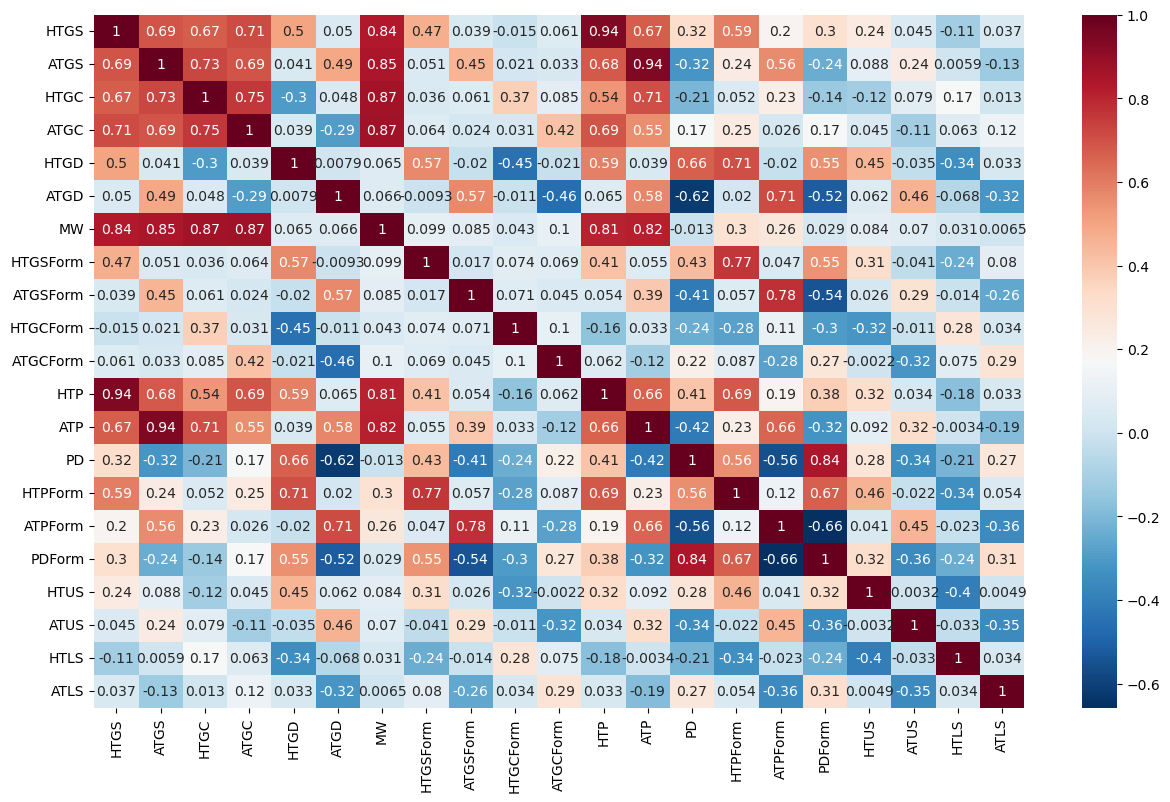

In [63]:
plt.figure(figsize=(15, 9))
corr_matrix = X_train[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show();

In [64]:
# Recorremos la mtraix en búsqueda de coeficientes mayores a 0.7
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j], sep=' - ')

HTGC - ATGS - 0.7253980729003031
ATGC - HTGS - 0.7138037410516768
ATGC - HTGC - 0.7544933566591121
MW - HTGS - 0.8368060562894023
MW - ATGS - 0.8478112697428287
MW - HTGC - 0.8675718242287577
MW - ATGC - 0.8741308373896574
HTP - HTGS - 0.9428479380461336
HTP - MW - 0.8095813623739706
ATP - ATGS - 0.944034461080371
ATP - HTGC - 0.7083751364255523
ATP - MW - 0.8182084559332402
HTPForm - HTGD - 0.7055543058419225
HTPForm - HTGSForm - 0.7660615881044659
ATPForm - ATGD - 0.7130770817033948
ATPForm - ATGSForm - 0.7795868439642204
PDForm - PD - 0.8448003127949829


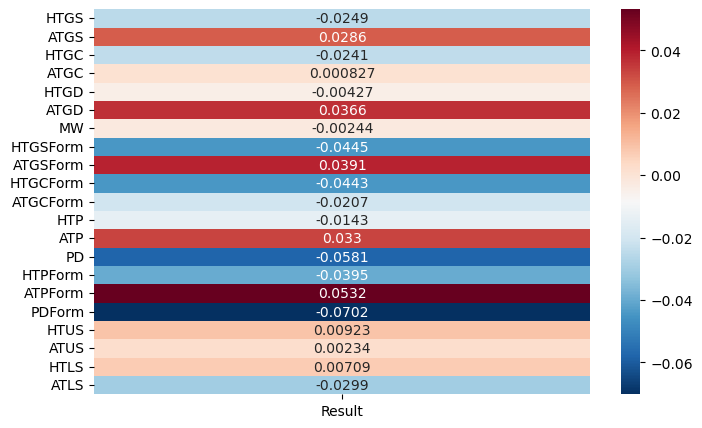

In [65]:
plt.figure(figsize=(8,5))
X_y = X_train[num_cols].copy()
X_y['Result'] = y_train

corr_matrix = X_y.corr()[['Result']].drop(labels=['Result'])

sns.heatmap(corr_matrix, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [66]:
for i in corr_matrix.index:
    if abs(corr_matrix.loc[i, 'Result']) < 0.002:
        print(i, corr_matrix.loc[i, 'Result'])

ATGC 0.0008268184025300105


#### Mutual Information

In [67]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    """Función que calcula el mi score de los features numéricos
    """
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=68)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_train[num_cols], y_train, discrete_features)

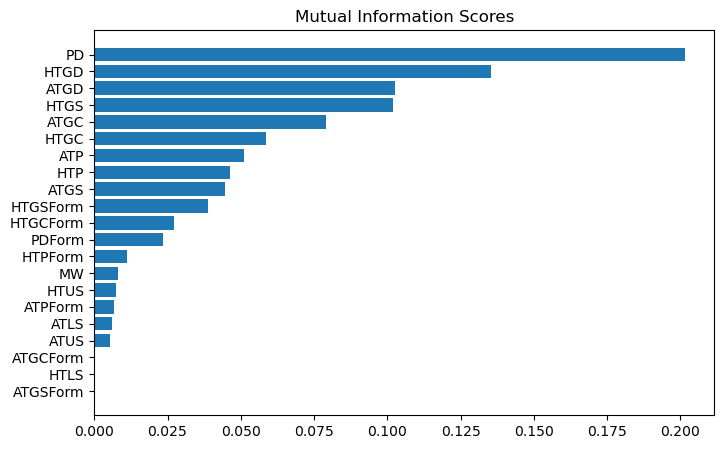

In [68]:
def plot_mi_scores(scores):
    """Función que grafica el score obtenido del MI
    """
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [69]:
from sklearn.feature_selection import SelectKBest
from functools import partial

# Elección de los k mejores features en base al MI score
score_func = partial(mutual_info_regression, discrete_features=discrete_features,
                     random_state=68)

selection = SelectKBest(score_func=score_func, k=3)

selection.fit_transform(X_train[num_cols], y_train)

select_columns = list(X_train.columns[selection.get_support(indices=True)])
select_columns

['HTGD', 'ATGD', 'PD']

## Entrenamiento

In [70]:
X_train.head()

,HTGS,ATGS,HTGC,ATGC,HTGD,ATGD,MW,HTGSForm,ATGSForm,HTGCForm,...,ALM_4_M,ALM_4_W,HLM_5_D,HLM_5_L,HLM_5_M,HLM_5_W,ALM_5_D,ALM_5_L,ALM_5_M,ALM_5_W
0,-0.097712,0.145629,-0.223875,0.595924,0.135573,-0.525918,0.699735,-0.724554,-0.453830,-0.910151,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.770934,-0.522872,-0.966626,-0.502631,0.135573,-0.084599,-0.632386,-0.592392,0.073365,-0.983609,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.114087,1.348932,0.370326,-0.282920,1.003120,2.121997,0.802205,0.554952,0.790936,-0.342210,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.434323,0.279330,0.593151,0.522687,-1.252501,-0.261127,0.494793,-1.009609,-0.119103,0.205327,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.171576,-0.121771,-0.818076,-0.356157,1.176629,0.268456,-0.632386,1.910905,1.127755,-0.608156,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Elección de features 

In [71]:
scores = get_scores(X_train, X_valid, y_train, y_valid)
scores

{'LogisticRegression': 0.6126760563380281,
 'SVC': 0.6197183098591549,
 'DecisionTreeClassifier': 0.5809859154929577,
 'RandomForestClassifier': 0.6408450704225352,
 'XGBClassifier': 0.5915492957746479}

In [72]:
X_train_2 = X_train[select_columns + obj_cols.to_list()]
X_valid_2 = X_valid[select_columns + obj_cols.to_list()]
scores_2 = get_scores(X_train_2, X_valid_2, y_train, y_valid)
scores_2

{'LogisticRegression': 0.6408450704225352,
 'SVC': 0.602112676056338,
 'DecisionTreeClassifier': 0.5633802816901409,
 'RandomForestClassifier': 0.647887323943662,
 'XGBClassifier': 0.6197183098591549}

In [73]:
X_train_3 = X_train[select_columns + obj_cols.to_list() + ['HTP', 'ATP']]
X_valid_3 = X_valid[select_columns + obj_cols.to_list() + ['HTP', 'ATP']]
scores_3 = get_scores(X_train_3, X_valid_3, y_train, y_valid)
scores_3

{'LogisticRegression': 0.6267605633802817,
 'SVC': 0.6056338028169014,
 'DecisionTreeClassifier': 0.5598591549295775,
 'RandomForestClassifier': 0.6232394366197183,
 'XGBClassifier': 0.6161971830985915}

In [74]:
X_train_4 = X_train[select_columns + ['HTP', 'ATP']]
X_valid_4 = X_valid[select_columns + ['HTP', 'ATP']]
scores_4 = get_scores(X_train_4, X_valid_4, y_train, y_valid)
scores_4

{'LogisticRegression': 0.6619718309859155,
 'SVC': 0.6232394366197183,
 'DecisionTreeClassifier': 0.5809859154929577,
 'RandomForestClassifier': 0.5915492957746479,
 'XGBClassifier': 0.602112676056338}

In [75]:
form_columns = [cols for cols in num_cols if cols.endswith('Form')]
X_train_5 = X_train[form_columns + obj_cols.to_list()]
X_valid_5 = X_valid[form_columns + obj_cols.to_list()]
scores_5 = get_scores(X_train_5, X_valid_5, y_train, y_valid)
scores_5

{'LogisticRegression': 0.6161971830985915,
 'SVC': 0.6091549295774648,
 'DecisionTreeClassifier': 0.6443661971830986,
 'RandomForestClassifier': 0.6302816901408451,
 'XGBClassifier': 0.6091549295774648}

## Resultados

In [76]:
title_list = ['Baseline', 'All features', 'Selected and Encoded Features', "Selected, Encoded and 'HTP', 'ATP' Features",
             "Selected and 'HTP', 'ATP' Features", 'Only Form and Encoded Features']

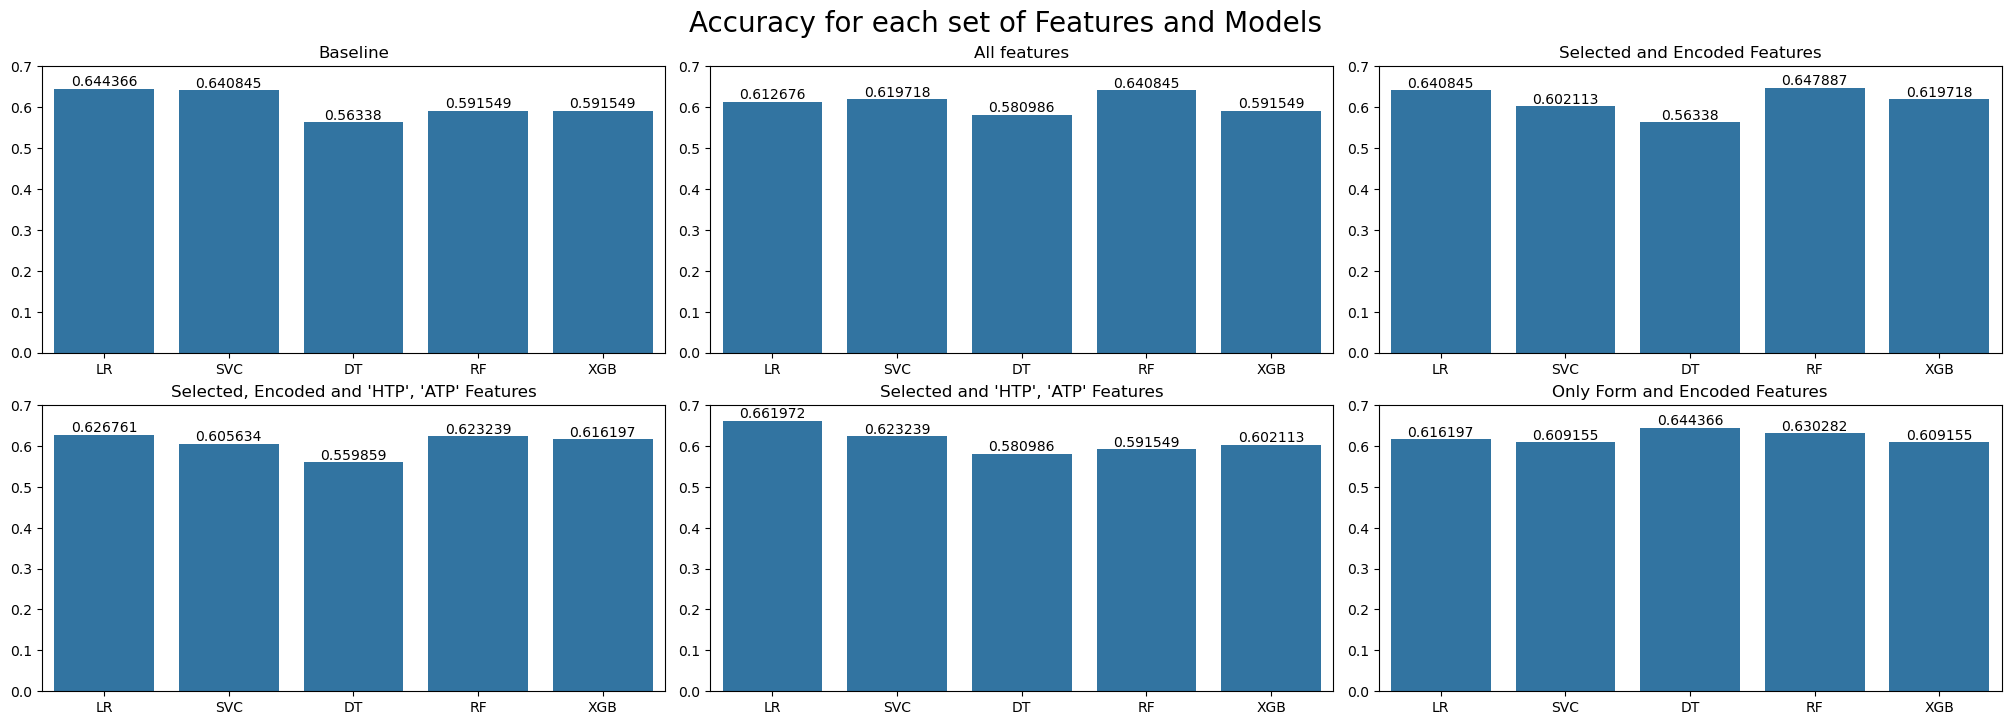

In [77]:
scores_list = [scores_1, scores, scores_2, scores_3, scores_4, scores_5]

fig, axs = plt.subplots(3, 3, figsize=(20, 10), constrained_layout=True)

# Eliminar axis innecesario
axs = axs.flat
for ax in axs[len(scores_list):]:
    ax.remove()
    
axs = axs[:len(scores_list)]

fig.suptitle('Accuracy for each set of Features and Models', fontsize=20)

# Graficar cada score
for i, score in enumerate(scores_list):
    ax = axs[i]
    x = np.arange(len(score))
    sns.barplot(x=score.keys(), y=score.values(), ax=ax)

    # Ponemos el valor encima de cada barra
    ax.bar_label(ax.containers[0], fontsize=10);
    # Seteamos el valor de los ticks
    ax.set_xticks(np.arange(len(score.keys())))
    # Seteamos el valor de las etiquetas de los ticks con abreviaciones
    ax.set_xticklabels(['LR', 'SVC', 'DT', 'RF', 'XGB'])
    # Seteamos el limite superior del eje y 
    ax.set_ylim(top=0.7)
    # Seteamos el título de cada figura
    ax.set_title(title_list[i])